# ELE 435/535 Homework 4

## Unconstrained Optimization Using Gradient Descent

In this homework, we will examine the minimization of functions using gradient descent. Of particular interest is the convergence rate of the algorithm. We examine this for convex and strongly coinvex functions. We also that the convewrgence rate depends on the characteristics of the problem.

Credits: Adapted from practicals by Francis Bach, Alexandre d'Aspremont, Pierre Gaillard and Aude Genevay.

## Preliminaries 

### Gradient Descent

Let $f\colon \mathbb{R}^n \rightarrow \mathbb{R}$ be differentiable with gradient $\nabla f(x)$. Gradient descent attempts to find a local minimum of $f$ using the iterative algorithm:
$$
x_{t+1} = x_t -\gamma \nabla f(x_t),\quad x_0\in \mathbb{R^n}.
$$

In order to ensure convergence to a local minimum the fixed step size $\gamma$ can't be too big. The standard fixed step size is $\gamma = 1/L$  where $L$ is a uniform upper bound on the largest eigenvlaue of $\nabla^2f(x)$.
    
### Linear Convergence

When the rate of convergence of an optimization algorithm satisfies 

$$
|f(x_t)-f(x^\star)| \leq C \alpha ^t
$$

for some constant $0< \alpha <1$, the error $|f(x_t)-f(x^\star)|$ converges to $0$ exponentially in $t$. By taking logs of both sides you see that 

$$
\log (|f(x_t)-f(x^\star)|)\leq t \log(\alpha) + \log (C).
$$

This is also termed "linear convergence".

### Ridge Regression

We will examine the following quadratic minimization problem: 

$$\min_{x \in \mathbb{R}^n}\  f(x) = \frac{1}{2m}\|y - F x\|^2_2+\frac{\lambda}{2} \|x\|_2^2$$

Here $F \in \mathbb{R}^{m \times n}$ is a given matrix and $y \in \mathbb{R}^m$ is a given vector. The constant $\lambda$ is a hyperparameter that weights the relative importance of the second term versus the first term in $f(x)$. This particular problem is known as **ridge regression**.

We have selected this problem as a testbed since it has a known solution. The optimal $x^\star$ for the ridge regression problem is

$$
x^\star = (F^T F + m\lambda I)^{-1}F^T y.
$$

What we want to explore is the convergence rate of gradient descent to the known solution.

### Before Starting the Computational Exercises

You will need to find: $\nabla f(x)$ and $\nabla^2 f(x)$ for the ridge regression problem. Also consider whether $f(x)$ is strongly convex. If so, determine the maximum value of $c$ for which it is $c$-strongly convex.

ANS: $\nabla f(x) = \left (\frac{1}{m} F^TF + \lambda I_n \right ) x - \frac{1}{m} F^T y$

ANS: $\nabla^2f(x) = \frac{1}{m}F^T F + \lambda I_n$ 

ANS: $f(x)$ is strongly convex since $f(x) -\frac{\lambda}{2}\|x\|_2^2$ is convex. It is hence also strictly convex and convex. To find the largest $c$ for which it is $c$-strongly convex expand $f(x)$ to find the quadratic term. Subtractinhg $\frac{c}{2} x^Tx$ from this term yields
    $$
    x^T \left (\frac{1}{2m} F^TF + \frac{\lambda}{2} I -\frac{c}{2} I\right ) x\ +\ ...
    $$
To ensure the result is convex we need the quadratic term to be PSD. Hence
    $$
    c \leq \lambda + \frac{1}{m} \lambda_{\min}(F^TF).
    $$

# Computational Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline 

## 1. Warm-up: A strongly convex versus strictly convex function

### Two scalar functions 

(a) Write a python function to compute and return $f_1(x)=x^2$ and $\nabla f_1(x)$.

(b) Write python function to compute and return $f_2(x)=x^4$ and $\nabla f_2(x)$.

(c) Code a gradient descent algorithm that calls the appropriate functions defined above and computes the minimum of the function. Use a step size $\gamma = 0.1$, a maxiumum of $200$ interations, and stopping criterion $|\nabla f(x)|< \epsilon =10^{-3}$.

(d) Plot $|x_t-x^\star|$ versus the number of iterations $t$, where $x_t$ is the $t$-th iterate of gradient descent and $x^\star$ is the known solution. To display the convergence speed of the algorithms, plot in a logarithmic scale. For this you may find the Python functions `semilogx, semilogy, loglog` useful. Display convergence plots for both functions on one graph. How and why are the plots different?

In [2]:
# define the objective function x^2
def objfuncX2(x):
    return x**2, 2*x

def objfuncX4(x):
    return x**4, (4*(x**3))

def gradDecent(obj):
    
    #defining constants
    it = 0
    maxIt = 200
    step = 0.1
    eps =1e-3
    
    #getting random number as imput
    old_x = 0.5; #random.randint(1,5)
    x_list = [old_x]
    
    #starting loop
    while (it<maxIt):
        it +=1
        fx,gradx = obj(old_x)
        
        if (abs(gradx) <= eps ):
            break
        
        new_x = old_x - gradx*step
        old_x = new_x
        x_list.append(old_x)
        
    print("Number of iterations :", it)
    print("Min after X iterations is:", new_x,"\n")
    return x_list

Number of iterations : 32
Min after X iterations is: 0.0004951760157141523 

Number of iterations : 200
Min after X iterations is: 0.0775469722576131 



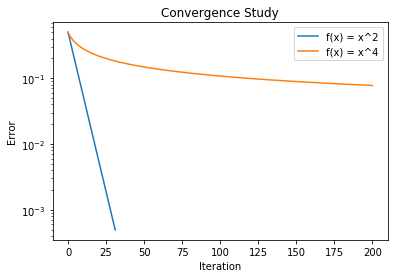

ANSWER: The convergence for x^2 is linear in a log plot and way faster than the convergence of x^4 wich is non linear in the same plot
ANSWER: The plots are different becaues x^2 is a strogly convex function while x^4 is a strictly convex function. Furthermore, as we get closer and closer to the minimum, the gradient of x^4 becomes significantly smaller than the gradient of x^2, meaning that gradient decent becomes less and less efficient as we get closer to zero.


In [3]:
# doing gradient decent on x^2
x2_list = gradDecent(objfuncX2)

#doing gradient decent on x^4
x4_list = gradDecent(objfuncX4)

plt.semilogy(x2_list,label="f(x) = x^2")
plt.semilogy(x4_list,label="f(x) = x^4")
plt.legend()
plt.title('Convergence Study')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

print("ANSWER: The convergence for x^2 is linear in a log plot and way faster than the convergence of x^4 wich is non linear in the same plot")
print("ANSWER: The plots are different becaues x^2 is a strogly convex function while x^4 is a strictly convex function. Furthermore, as we get closer and closer to the minimum, the gradient of x^4 becomes significantly smaller than the gradient of x^2, meaning that gradient decent becomes less and less efficient as we get closer to zero.")

## 2. Ridge Regession

### Step 1: Generate F and y

(a) Generate a random matrix $F \in \mathbb{R}^{m \times n}$ of size $m=50$ and $n=60$ where each row of $F$ belongs to $[0,1]^n$. The numpy cammand `np.random.rand` may be useful. Note that $F$ will have linearly dependent columns. Why?

(b) Model $y$ as $Fx + w$ where $x\in \mathbb{R}^n$ and $w$ is a normally distributed noise vector in $\mathbb{R}^m$. Generate $x \in [0,1]^n$. Then generate a target vector $y \in \mathbb{R}^m$. The numpy command `random.randn` may be useful. 

ANS: The number of columns in $F$ is greater than the number of rows. Hence the rank of $F$ is at most the number of rows. So the columns must be linearly depedent.

In [4]:
n = 60 # dimension of x
m = 50  # number of data points
F = np.random.rand(m,n)

w = np.random.randn(m)
x = np.random.rand(n)
y = F @ x + w

print("y shape is:",y.shape,"\n")
print("ANSWER: F has more columns that rows, which means that the maximum number of linearly indipendent columns or rows is m. Since m<n, it is garanteed that the columns will have some linear dependency on each other")

y shape is: (50,) 

ANSWER: F has more columns that rows, which means that the maximum number of linearly indipendent columns or rows is m. Since m<n, it is garanteed that the columns will have some linear dependency on each other


### Step 2: Numerically compute the solution of ridge regression

(a) Numerically compute the largest eigenvalue and smallest eigenvalue of $\nabla^2 f(x) = P = \frac{1}{m}F^T F + \lambda I$. These will be used to set the constant step size in gradient descent and to bound the rate of convergence.

In addition, compute and display the condition number of the matrix:
$$\frac{\lambda_{\max}(P)}{\lambda_{\min}(P)}.$$
A very large condition number is a warning of a lack of numerical robustness. Investigate what happens for small $\lambda$ values (say, $\lambda=0.01$). Report your observations and interpretation below.

(b) Now compute $x^\star$ and $f(x^\star)$ numerically. It's good practice to avoid computing a matrix inverse. Instead solve a set of linear equations. See the numpy command `linalg.solve`.

ANS: 

In [5]:
# regularization parameter (lambda)
reg = 0.1        

#defining matrix
P = (1/m)*(F.T @ F) + reg*np.identity(n)

#calculating e-values
evalues = np.linalg.eigvals(P)

maxEValue = np.real(evalues.max())
minEValue = np.real(evalues.min())
conditionNumber = maxEValue/minEValue
print("Maximum eigevalue: ", maxEValue)
print("Minimum eigevalue: ", minEValue)
print("Condition Number: ", conditionNumber)

print("\nANSWER: As we decrease lambda our condition number increases. This makes sense, as the e-values of P are the e-values of the (F.T F) matrix plus lambda. This esentially means that the minimum e-value is equal to or very close to lambda. Therfore, as we decrease lambda, the Condition number increases accordingly, as we start dividing by smaller and smaller numbers ")


Maximum eigevalue:  15.547047667773715
Minimum eigevalue:  0.09999999999999967
Condition Number:  155.47047667773765

ANSWER: As we decrease lambda our condition number increases. This makes sense, as the e-values of P are the e-values of the (F.T F) matrix plus lambda. This esentially means that the minimum e-value is equal to or very close to lambda. Therfore, as we decrease lambda, the Condition number increases accordingly, as we start dividing by smaller and smaller numbers 


In [6]:
# solving for xStar
xStar=np.linalg.solve( (F.T@F + m*reg*np.identity(n)), (F.T @ y) )

# solving for f(xStar)
fxStar=0.5*m*(np.linalg.norm(y-F@xStar)**2) + 0.5*reg*(np.linalg.norm(xStar)**2) 

print("xStar:",xStar)
print("f(xStar):", fxStar)

xStar: [ 0.46897365  0.7223534   0.22748897  0.80829506  0.10664966  0.40859791
  0.57208606  0.69609382  0.67205286  0.99249737  0.62852691  0.71027912
  0.70779412  0.30270773  0.41103871  0.36012174  0.59177903  0.48967288
  0.60593047  0.64321052  0.54610458  0.54208197  0.21516651  0.55367462
  0.40982102  0.57814434  0.66284859  1.02141304  0.23687777  0.23617219
  0.38857091  0.4444104   0.53245984  0.31853346  0.48613945  0.20634197
  0.46619961  0.63329512  0.35408071  0.30308843  0.48990562  0.55797393
  0.32291793  0.40246414  0.88563225  0.39218205  0.3674859   0.29730511
  0.64048156  0.500195    0.74497429  0.41540279  0.39305848  0.16741409
  0.35177188  0.57506035  0.39400838  0.4924681  -0.00520159  0.37559138]
f(xStar): 590.2946550304367


### Step 3: Solve ridge regression using gradient descent

Now that we know the solution $x^\star$ and the largest and smallest eigenvalues of $P$ and we can explore the convergence of gradient descent with both constant stepsize and variable step size.

(a) Put your code from the above steps together into one new code block to implement gradient descent using the standard constant step-size to numerically find the vector $x_*$ that minimizes the ridge regression function and the minimum value of the function. 

* Use $\lambda = 1.0$.

* Stopping criterion: $\|\nabla f(x)\|_2 < \epsilon = 10^{-3}$. The numpy command `linalg.norm` may be useful. 

* Set the constant step size $\gamma$ using largest eigenvalue of $\nabla^2f(x)$. 

(b) Display your results by plotting $\|x_t-x^\star\|_2$ versus the number of iterations $t$, where $x_t$ is the $t$-th iterate of gradient descent and $x^\star$ is the pre-computed ridge regression solution. The convergence speed of algorithms is displayed by plotting in a logarithmic scale. For this you may find the Python functions `semilogx, semilogy, loglog` useful. Your plot should be a straight line.

(c) Now add to your code an implementation of gradient descent using the optimal variable step size (for quadratic functions) to find the minimum and minmum value of the ridge regression function. Use the same paramters as in partt (a).
To aid comparison, plot your convergence results on the same graph produced in part (b).

(d) Finally add these two bounds to your plot: 

(i) constant step bound: $e^{-2\lambda_{\max}(P) \gamma t}$ and 

(ii) optimal step bound: $e^{-2\lambda_{\max}(P) \sum_{i=1}^t \gamma_i}$. 

These bounds are derived from the gradient flow approximation and are valid when the step sizes are small (See HW 4 Theory).


In [7]:
# Your code to specify n, m, and select F and y

reg = 1 #regularization parameter
n = 60 # dimension of x
m = 50  # number of data points
F = np.random.rand(m,n)
w = np.random.randn(m)
x = np.random.rand(n)
y = F @ x + w

In [8]:
# Gradient Descent

def gradDecentConstantStep(xInitial,Lambda):
    
    reg = Lambda
    x = xInitial
    xStar=np.linalg.solve( (F.T@F + m*reg*np.identity(n)), (F.T @ y) )
    
    it = 0
    maxIt = 200
    eps =1e-3
    
    #calculating second derivative and defining step
    Second = (1/m)*(F.T @ F) + reg*np.identity(n) 
    step = 1/np.real(np.linalg.eigvals(Second).max())
    
    #getting random number as imput
    norm_list = []
    
    #starting loop
    while (it<maxIt):
        
        #calculating first derivative
        First = (Second @ x) - (1/m)*(F.T @ y)
        
        if (np.linalg.norm(First,2) <= eps):
            break
            
        new_x = x - First*step
        
        norm = np.linalg.norm((new_x-xStar),2)
        
        x = new_x
        it +=1
        norm_list.append(norm)
        
    print("Number of iterations :", it)
    print("norm(x-xStar) after N iterations:", norm,"\n")
    return norm_list, step

print("ANSWERS PART A:")
normList1, stepCons1 = gradDecentConstantStep(x,reg)

ANSWERS PART A:
Number of iterations : 115
norm(x-xStar) after N iterations: 0.0009652316248019222 



Number of iterations (optimal) : 31
norm(x-xStar) after N iterations (optimal): 0.0007917559129372589 

ANSWERS PART B: The plot for constant step is a straight line, as it should be


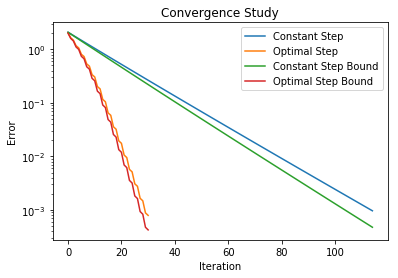

In [9]:
def gradDecentOptimalStep(xInitial, Lambda):
    
    x = xInitial
    reg = Lambda
    xStar=np.linalg.solve( (F.T@F + m*reg*np.identity(n)), (F.T @ y) )
    
    it = 0
    maxIt = 200
    eps =1e-3
    
    #calculating second derivative and defining step
    Second = (1/m)*(F.T @ F) + reg*np.identity(n) 
    First = (Second @ x) - (1/m)*(F.T @ y)
    step = (First@First.T)/(First.T @ P @ First)
    
    #getting random number as imput
    norm_list = []
    step_list =[]
    
    #starting loop
    while (it<maxIt):
        
        #calculating first derivative
        First = (Second @ x) - (1/m)*(F.T @ y)
        
        step = (First@First.T)/(First.T @ P @ First)
        
        if (np.linalg.norm(First,2) <= eps):
            break
            
        new_x = x - First*step
        
        norm = np.linalg.norm((new_x-xStar),2)
        
        x = new_x
        it +=1
        norm_list.append(norm)
        step_list.append(step)

        
    print("Number of iterations (optimal) :", it)
    print("norm(x-xStar) after N iterations (optimal):", norm,"\n")
    return norm_list, step_list

normList2, step_list_optimal = gradDecentOptimalStep(x,reg)

print("ANSWERS PART B: The plot for constant step is a straight line, as it should be")

##calculating the bounds
constantStepBound1 = []
for i in range(0,len(normList1)):
    constantStepBound1.append(np.exp(-i*minEValue*stepCons1)*normList1[i])
        
cumSumOptimal1 = np.cumsum(step_list_optimal)
optimalStepBound1 =[]
for i in range(0,len(cumSumOptimal1)):
    optimalStepBound1.append(np.exp(-minEValue*cumSumOptimal1[i])*normList2[i])

plt.semilogy(normList1,label="Constant Step")
plt.semilogy(normList2,label="Optimal Step")
plt.semilogy(constantStepBound1,label="Constant Step Bound")
plt.semilogy(optimalStepBound1,label="Optimal Step Bound")
#plt.ylim(10e-5, 5) 

plt.legend()
plt.title('Convergence Study')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()


### Part 4: Investigate the effect of changing $\lambda$
    
(a) Display the convergence plots for various values of $\lambda$. First use a fixed step size; then use a optimal step size and compare the results. You can use four values $\lambda \in [1.0,4.0]$. Explain why the convergence rates are changing with $\lambda$. 

Number of iterations : 115
norm(x-xStar) after N iterations: 0.0009652316248019222 

Number of iterations (optimal) : 31
norm(x-xStar) after N iterations (optimal): 0.0007917559129372589 



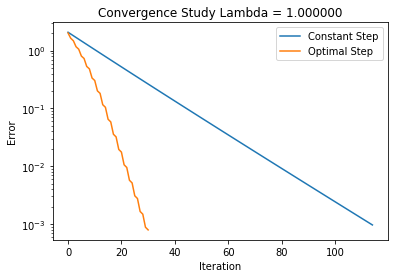

Number of iterations : 83
norm(x-xStar) after N iterations: 0.0006399123885927294 

Number of iterations (optimal) : 33
norm(x-xStar) after N iterations (optimal): 0.0005186051053058054 



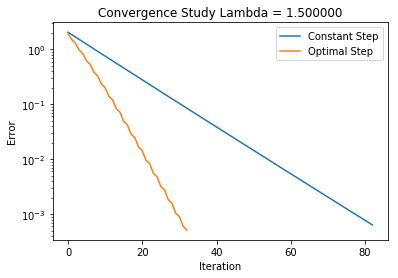

Number of iterations : 56
norm(x-xStar) after N iterations: 0.00033900581171665323 

Number of iterations (optimal) : 31
norm(x-xStar) after N iterations (optimal): 0.0001582024050490767 



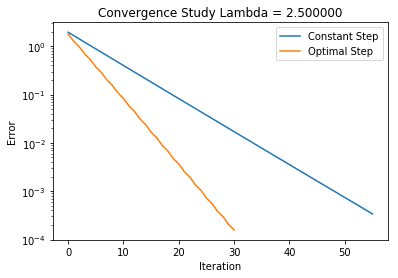

Number of iterations : 39
norm(x-xStar) after N iterations: 0.00020151982677191747 

Number of iterations (optimal) : 23
norm(x-xStar) after N iterations (optimal): 0.00010968804438339443 



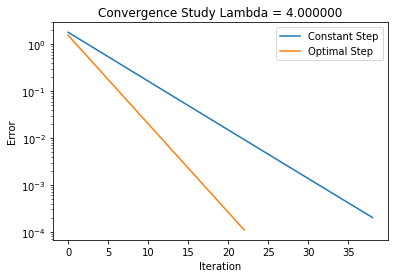

ANSWER: As we increase lambda so we also decrease our convergence times (we decrease the number of iterations). This is due to the fact that large lambdas make the quadratic term in our equation more dominant, which then also makes our function more strongly convex. This makes our gradient decent technique more efficient, even if we end up having smaller steps as a result of larger eigenvalues when we increase lambda.


In [15]:
lambdas = np.array([1.0, 1.5, 2.5, 4.0])

for reg in lambdas:
    #doing gradient decent
    normListConst, stepCons = gradDecentConstantStep(x,reg)
    normListOptimal, stepList = gradDecentOptimalStep(x,reg)
    
    #plotting
    plt.semilogy(normListConst,label="Constant Step")
    plt.semilogy(normListOptimal,label="Optimal Step")

    plt.legend()
    plt.title('Convergence Study Lambda = %f' %reg)
    plt.ylabel('Error')
    plt.xlabel('Iteration')
    plt.show()
    
print("ANSWER: As we increase lambda so we also decrease our convergence times (we decrease the number of iterations). This is due to the fact that large lambdas make the quadratic term in our equation more dominant, which then also makes our function more strongly convex. This makes our gradient decent technique more efficient, even if we end up having smaller steps as a result of larger eigenvalues when we increase lambda.")

### Part 5: Small Values of lambda

(a) In terms of convexity, what happens to the ridge regression function when $\lambda \rightarrow 0$? 

(b) Since $F^TF$ is singular, when we select $\lambda$ to be very small, some of the eigenvalues of $P$ become close to zero while the largest eigenvlaues of $P$ remain little changed. As a result the level sets of the quadratic function become elongated and narrow. The gradient is always orthogonal to the level sets. This can result in making slow progress in minimizing $f$. 

Check this by plotting the convergence curves for both the standard constant step and the optimal step size on the same graph. Use $\lambda=0.1$. On the same graph plot the constant step bound and optimal step bound defined previously.

ANS: (a) The regularization parameter $\lambda$ changes the quadratic term in the function. As $\lambda$ gets larger, the function gets more strongly convex; as $\lambda$ gets small it is less strongly convex. If $F$ has linearly dependent columns, $\lambda_{\min}(P)$ will converege to $0$ as $\lambda \rightarrow 0$.

ANSWER (a): Our function becames less strongly convex as lambda goes to zero. In other words, the minimum c-convex value becomes smaller as lambda goes to zero.

ANSWER (b): 
Number of iterations : 200
norm(x-xStar) after N iterations: 0.3591185835622471 

Number of iterations (optimal) : 68
norm(x-xStar) after N iterations (optimal): 0.007235310592845974 



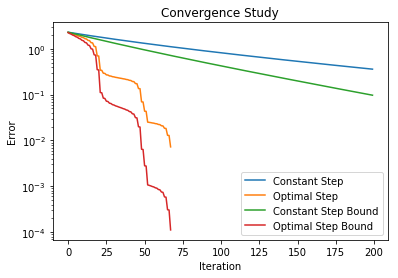

In [11]:
print("ANSWER (a): Our function becames less strongly convex as lambda goes to zero. In other words, the minimum c-convex value becomes smaller as lambda goes to zero.")
      
print("\nANSWER (b): ")

#doing gradient decent
normListConst, stepCons = gradDecentConstantStep(x,0.1)
normListOptimal, stepList = gradDecentOptimalStep(x,0.1)

##calculating boundns
constantStepBound = []
for i in range(0,len(normListConst)):
    constantStepBound.append(np.exp(-i*minEValue*stepCons)*normListConst[i])
        
cumSumOptimal = np.cumsum(stepList)
optimalStepBound =[]
for i in range(0,len(cumSumOptimal)):
    optimalStepBound.append(np.exp(-minEValue*cumSumOptimal[i])*normListOptimal[i])

##plotting
plt.semilogy(normListConst,label="Constant Step")
plt.semilogy(normListOptimal,label="Optimal Step")
plt.semilogy(constantStepBound,label="Constant Step Bound")
plt.semilogy(optimalStepBound,label="Optimal Step Bound")

plt.legend()
plt.title('Convergence Study')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()
